<a href="https://colab.research.google.com/github/wizard339/education/blob/main/sorting_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

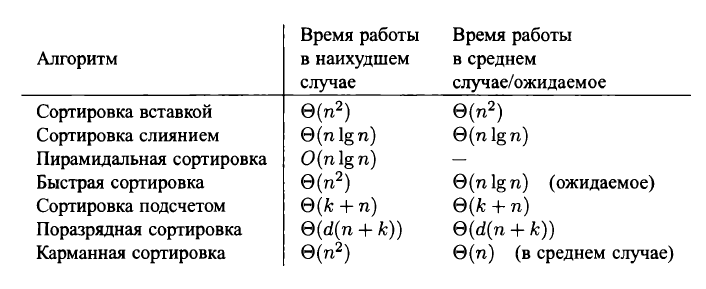

# 1 Алгоритмы сортировки сравнением (comparision sorts)
*при сортировке используют только сравнение входных элементов.*

В наихудшем случае производят не менее **Ω(n*lg(n))** сравнений.

## 1.1 Алгоритм сортировки слиянием (merge sort)
*Алгоритм использует метод "разделяй и властвуй". Сначала массив разделяется на две половинки поменьше, затем каждую из них сортируют отдельно. После этого соединяются два упорядоченных массива.*

Время работы: **O(n*lg(n))** .

In [ ]:
def merge_sort(arr, p, r):
    """
    The algorithm uses the "divide and conquer" method. First, the array is split
    into two smaller halves, then each of them is sorted separately. After that,
    two ordered arrays are connected
    -------------
    Input::  `arr` is an array with numbers;
             `p` and `r` are bounds of merged parts.
    Output:: a sorted array with numbers
    """
    if p < r:
        q = (p + r) // 2
        merge_sort(arr, p, q)
        merge_sort(arr, q + 1, r)
        merge(arr, p, q, r)
    else:
        return


def merge(arr, p, q, r):
    # create a copy of array
    left = arr[p: q + 1]
    right = arr[q + 1: r + 1]

    n1 = len(left)
    n2 = len(right)
    # create pointers for indexing in the `left`, `right` and `arr` arrays
    i = 0
    j = 0
    k = p

    # until we get to the end of the array, we select the largest value
    # and put it in the desired position
    while i < n1 and j < n2:
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1

    # if there are elements left in arrays
    while i < n1:
        arr[k] = left[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = right[j]
        j += 1
        k += 1



array_for_sort = [3, 19, 5, 5, 30, 15, 11]
merge_sort(array_for_sort, 0, len(array_for_sort) - 1)
print(array_for_sort)

[3, 5, 5, 11, 15, 19, 30]


## 1.2 Пирамидальная сортировка (heapsort)
Данный алгоритм использует специальную структуру данных, а именно *бинарную пирамиду (binary heap)*.

Время работы: **O(n*lg(n))** .

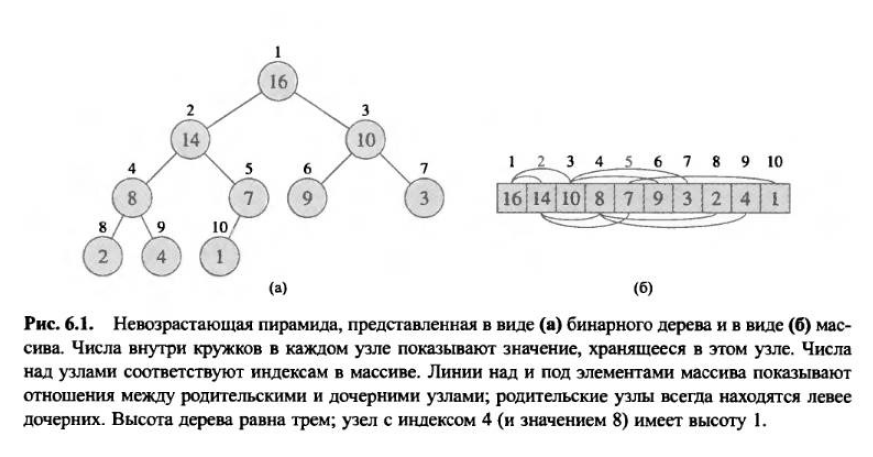

In [ ]:
class BinHeap:

    def __init__(self):
        self.arr = []
        self.heapsize = 0

    def parent(self, i):
        """index of the parent value in the heap"""
        return i // 2
        
    def left(self, i):
        """index of the left descedent value in the heap"""
        return 2*i + 1
    
    def right(self, i):
        """index of the right descedent value in the heap"""
        return 2*i + 2
    
    def heapify(self, i):
        """the main property of the heap"""
        l = self.left(i)
        r = self.right(i)
        if l <= self.heapsize and self.arr[l] > self.arr[i]:
            largest = l
        else:
            largest = i
        if r <= self.heapsize and self.arr[r] > self.arr[largest]:
            largest = r
        if largest != i:
            # explicit exchange of values
            tmp = self.arr[i]
            self.arr[i] = self.arr[largest]
            self.arr[largest] = tmp
            self.heapify(largest)
       
    def build_heap(self, arr):
        self.heapsize = len(arr) - 1
        self.arr = arr
        for i in range((len(arr) // 2), -1, -1):
            self.heapify(i)

    def build_heap_insert(self, arr):
        """building the heap with insertions"""
        self.heapsize = 1
        for i in range(1, len(arr)):
            self.heap_insert(self.arr, arr[i])
            
    def heapsort(self, arr):
        self.build_heap(arr)
        for i in range(len(arr) - 1, 0, -1):
            tmp = self.arr[0]
            self.arr[0] = self.arr[i]
            self.arr[i] = tmp
            self.heapsize -= 1
            self.heapify(0)

    def heap_extract_max(self, arr):
        """extraction of the max value from the heap"""
        self.build_heap(arr)
        if self.heapsize < 1:
            return 'the queue is empty'
        max_v = self.arr[0]
        self.arr[0] = self.arr[self.heapsize]
        self.arr.pop(self.heapsize)
        self.heapsize -= 1
        self.heapify(0)
        return max_v

    def heap_insert(self, arr, key):
        """insertion of the value to the heap"""
        # self.build_heap(arr)
        self.heapsize += 1
        i = self.heapsize - 1
        while i > 0 and self.arr[self.parent(i)] < key:
            self.arr[i] = self.arr[self.parent(i)]
            i = self.parent(i)
        self.arr[i] = key

    def heap_increase_key(self, arr, i, key):
        """
        increasing an element with index `i` to a value `k`
        """
        self.build_heap(arr)
        if self.arr[i] >= key:
            return
        else:
            while i > 0 and self.arr[self.parent(i)] < key:
                self.arr[i] = self.arr[self.parent(i)]
                i = self.parent(i)
            self.arr[i] = key

    def heap_delete(self, arr, i):
        """
        deleting an element with index `i` from the heap
        """
        arr.pop(i)
        self.build_heap(arr)


a = [27, 17, 3, 16, 13, 10, 1, 5, 7, 12, 4, 8, 9, 0]
b = [27, 17, 3, 16, 13, 10, 1, 5, 7, 12, 4, 8, 9, 0]
print(f"Initial a: {a}")
print(f"Initial b: {b}")
    
heap = BinHeap()
heap.build_heap(a)
print(f"After using build_heap(a): {a}")
heap.build_heap_insert(b)
print(f"After using build_heap_insert(b): {b}")
    
heap.heapsort(a)
heap.heapsort(b)
print(f"After sorting a: {a}")
print(f"After sorting b: {b}")
extracted_max = heap.heap_extract_max(a)
print(f"Extracted max value: {extracted_max}")
print(f"After exctracting of the max value: {a}")
heap.heap_insert(a, 100)
print(f"After insertion of the element: {a}")
heap.heap_increase_key(a, 5, 50)
print(f"After increasing of the element to value: {a}")
heap.heap_delete(a, 0)
print(f"After deleting of the element: {a}")

Initial a: [27, 17, 3, 16, 13, 10, 1, 5, 7, 12, 4, 8, 9, 0]
Initial b: [27, 17, 3, 16, 13, 10, 1, 5, 7, 12, 4, 8, 9, 0]
After using build_heap(a): [27, 17, 10, 16, 13, 9, 1, 5, 7, 12, 4, 8, 3, 0]
After using build_heap_insert(b): [27, 17, 3, 16, 13, 10, 1, 5, 7, 12, 4, 8, 9, 0]
After sorting a: [0, 1, 3, 4, 5, 7, 8, 9, 10, 12, 13, 16, 17, 27]
After sorting b: [0, 1, 3, 4, 5, 7, 8, 9, 10, 12, 13, 16, 17, 27]
Extracted max value: 27
After exctracting of the max value: [17, 13, 16, 10, 12, 7, 8, 9, 4, 1, 5, 0, 3]
After insertion of the element: [100, 17, 16, 13, 12, 7, 10, 9, 4, 1, 5, 0, 8]
After increasing of the element to value: [100, 50, 17, 13, 12, 16, 10, 9, 4, 1, 5, 0, 7]
After deleting of the element: [50, 17, 13, 12, 16, 10, 9, 4, 1, 5, 0, 7]


## 1.3 Быстрая сортировка
*Данный алгоритм применяет парадигму "разделяй и влавствуй".*

*Массив разбивается на два подмассива, таких что каждый элемент первого массива меньше или равен опорному элементу, а каждый элемент второго массива больше опорного элемента.*

*Далее подмассивы сортируются с помощью рекурсивного вызова процедуры быстрой сортировки.*

*Поскольку подмассивы сортируются на месте, для их объединения не требуюется никаких действий. Весь массив оказывается отсортированным.*

Время работы зависит от степени сбалансированности, которой характеризуется разбиение. Чем лучше сбалансированность, тем асимптотически быстрее работает алгоритм.

**Время работы в среднем случае: O(n*lg(n))**, кроме того постоянный множитель, скрытый в выражении, достаточно мал по величине.

**Время работы в худшем случае: O($n^2$)**.


In [ ]:
from random import randint

def quicksort(arr, p, r):
    if p < r:
        q = partition(arr, p, r)
        quicksort(arr, p, q)
        quicksort(arr, q + 1, r)


def partition(arr, p, r):
    x = arr[p]
    i = p - 1
    j = r + 1
    while True:
        j -= 1
        while arr[j] < x:
            j -= 1
        i += 1
        while arr[i] > x:
            i += 1
        if i < j:
            arr[i], arr[j] = arr[j], arr[i]
        else:
            return j


def randomized_partition(arr, p, r):
    i = randint(p, r)
    arr[p], arr[i] = arr[i], arr[p]
    return partition(arr, p, r)


def randomized_quicksort(arr, p, r):
    if p < r:
        q = randomized_partition(arr, p, r)
        randomized_quicksort(arr, p, q)
        randomized_quicksort(arr, q + 1, r)


a = [13, 19, 9, 5, 12, 8, 7, 4, 11, 2, 6, 21]
print(f"Before: {a}")
quicksort(a, 0, len(a) - 1)
print(f"After: {a}")
b = a = [13, 19, 9, 5, 12, 8, 7, 4, 11, 2, 6, 21]
print(f"Before: {b}")
randomized_quicksort(b, 0, len(b) - 1)
print(f"After: {b}") 

Before: [13, 19, 9, 5, 12, 8, 7, 4, 11, 2, 6, 21]
After: [21, 19, 13, 12, 11, 9, 8, 7, 6, 5, 4, 2]
Before: [13, 19, 9, 5, 12, 8, 7, 4, 11, 2, 6, 21]
After: [21, 19, 13, 12, 11, 9, 8, 7, 6, 5, 4, 2]


# 2 Алгоритмы сортировки за линейное время

## 2.1 Сортировка подсчетом (counting sort)
Основная идея данного алгоритма заключается в том, чтобы для каждого входного элемента  *x* определить количество элементов, которы меньше *x*. С помощью этой информации элемент *x* можно разместить в той позиции выходного массива, где он должен находиться.

Алгоритм обладает **устойчивостью (stable)**, т.е. элементы с одним и тем же значением находятся в выходном массиве в том же порядке, что и во входном.

**Время работы: Θ(n).**

In [1]:
def counting_sort(arr):
    k = max(arr)
    # creating an array to store the number of elements
    counts_arr = [0] * (k + 1)
    # creating an array to store the sorted sequence
    result_arr = [0] * len(arr)
    
    for j in range(len(arr)):
        counts_arr[arr[j]] += 1
    # now counts_arr[j] contains the number of elements equal to j

    for i in range(1, k + 1):
        counts_arr[i] += counts_arr[i - 1]
    # now counts_arr[i] contains the number of elements not exceeding i
    
    for j in range(len(arr) - 1, -1, -1):
        counts_arr[arr[j]] -= 1
        result_arr[counts_arr[arr[j]]] = arr[j]
        
        
    return result_arr


a = [4, 8, 3, 1, 5, 5]
print(counting_sort(a))

[1, 3, 4, 5, 5, 8]


## 2.2 Поразрядная сортировка (radix sort)
Изначально алгоритм использовался на машинах для сортировки перфокарт.

Смысл алгоритма заключается в том, чтобы сначала произвести сортировку подсчетом по младшему разряду, затем по следующему разряду и т.д.

**Время работы: Θ(n).**

In [2]:
def counting_sort_for_radix(arr, place_value):
    # we can assume hat the number of digits used to represent all numbers on the
    # place_value position is not greater than 10
    counts_arr = [0] * 10
    input_size = len(arr)
    result_arr = [0] * input_size

    # place_el is the value of the current place value of the current element, e.g. if
    # the current element is 123, and the place_value is 10, the place_el is equal to 2 
    for i in range(input_size):
        place_el = (arr[i] // place_value) % 10
        counts_arr[place_el] += 1

    for i in range(1, 10):
        counts_arr[i] += counts_arr[i - 1]

    for i in range(input_size - 1, -1, -1):
        place_el = (arr[i] // place_value) % 10
        counts_arr[place_el] -= 1
        result_arr[counts_arr[place_el]] = arr[i]
        

    return result_arr


def radix_sort(arr):
    k = max(arr)

    # find the number of digits in the maximum element
    d = 1
    while k >= 10:
        k /= 10
        d += 1

    place_value = 1

    # we pass from the smaller digit of the number to the larger one
    result_arr = arr
    while d > 0:
        result_arr = counting_sort_for_radix(result_arr, place_value)
        place_value *= 10
        d -= 1

    return result_arr


a = [4, 817, 3, 100, 50, 5]
print(radix_sort(a))

[3, 4, 5, 50, 100, 817]


## 2.3 Карманная сортировка (bucket sort)
Предполагается, что входные данные подчиняются равномерному закону распределения и имеют значения в интервале от [0, 1).

Алгоритм разбивает интервал [0, 1) на n одинаковых интвервалов или карманов (buckets), а затем распределяет по этим карманам n входных чисел. Поскольку те, в свою очередь, распределены равномерно в интервале [0, 1), то можно предположить, что в каждый из них попадет не очень много элементов. Далее каждый карман сортируется, а затем последовательно перечисляются элементы каждого кармана.

**Время работы в среднем случае: O(n).**

In [3]:
def insertion_sort(arr, ascending=True, inplace=True):
    """
    Аlgorithm `Insertion sort` is convenient for sorting short sequences. 
    Алгоритм `сортировки вставками` удобен для сортировки коротких последовательностей.
    
    This is the way cards are usually sorted: holding the already ordered cards in the left hand and
    taking the next card with the right hand, we insert it into the right place, comparing it with the
    existing ones and going straight to the left.
    Именно таким способом обычно сортируют карты: держа в левой руке уже упорядоченные карты и взяв
    правой рукой очереднуб карту, мы вставляем ее в нужное место, сравнивая с имеющимися и идя справо
    налево.
    __________________
    Input::  `arr` is the sequence of n numbers (a1, a2, ..., an);
             `ascending` is the mode of sorting (True - by ascending from min to max,
                                                 False - by descending from max to min);
             `inplace` is the sorting in place.
    Output:: `arr` is the permutation (a1', a2', ..., an') of the initial sequence for which
    a1'<= a2'<= ... <= an'.
    __________________
    
    Example input::  [31, 41, 59, 26, 41, 58].
    Example output:: [26, 31, 41, 41, 58, 59].
    """

    # if `inplace=False` then we create a copy of list
    res_arr = list(arr) if not inplace else arr
    if len(res_arr) == 1:
        return res_arr
    
    for j in range(1, len(res_arr)):
        key = res_arr[j]
        # add `arr[j]` to the sorted part `arr[1...j - 1]`
        i = j - 1
        # if sorting by ascending then we move the element to the left until it is greater than the
        # previous element;
        # if sorting by descending then we move the element to the left until it is less than the
        # previous element
        while i >= 0 and ((res_arr[i] > key) if ascending else
                          (res_arr[i] < key)):
            res_arr[i + 1] = res_arr[i]
            i = i - 1
        res_arr[i + 1] = key
    return res_arr


def bucket_sort(arr):
    n = len(arr)
    buckets = [[] for i in range(n)]

    # sorting elements of the arr by the buckets
    for i in range(n):
        bucket_number = int(n * arr[i])
        buckets[bucket_number].append(arr[i])

    # sorting each bucket using insertion_sort
    for i in range(n):
        insertion_sort(buckets[i])

    # combining into one resulting array
    result_arr = []
    for i in range(n):
        result_arr += buckets[i]

    return result_arr
    

a = [0.15, 0.29, 0.65, 0.44, 0.21, 0.91, 0.40]
print(bucket_sort(a))

[0.15, 0.21, 0.29, 0.4, 0.44, 0.65, 0.91]
